###**SUPERVISED LEARNING FOR 3000 SAMPLES PER CLASS.**

# Import Data for X and y

In [1]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

In [2]:
with open('/content/df_features_train3000.pickle', 'rb') as f:
    df_train = pickle.load(f)

In [ ]:
df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_electronic_014-052-127,0,-512.513306,49.239880,36.635098,36.231136,25.086309,17.622725,12.361383,6.291051,1.361823,...,0.103532,0.832282,0.112285,0.067642,0.073308,0.077919,0.107368,0.076912,0.052838,0
bass_synthetic_111-096-127,1,-638.111877,2.346831,-3.926074,3.134792,-1.294184,2.011733,-2.365173,1.458554,0.189836,...,0.206547,0.179271,0.219101,0.196307,0.249212,0.267878,0.303538,0.249895,0.240109,0
bass_synthetic_020-108-075,1,-564.268677,-1.420730,-0.795149,3.250593,-3.291362,1.071149,2.291963,-3.577422,2.212168,...,0.275572,0.221840,0.195931,0.186434,0.132046,0.122447,0.112924,0.111629,0.168877,0
bass_synthetic_030-078-100,1,-472.562500,15.968258,-23.635908,-8.557285,4.469436,-3.720913,-8.350245,-3.516767,5.632018,...,0.037288,0.060668,0.057510,0.781476,0.074805,0.064859,0.049139,0.026667,0.043386,0
bass_synthetic_131-080-100,0,-502.142853,30.960215,21.120899,21.180164,18.814318,18.428780,17.238117,16.952642,16.951662,...,0.330870,0.322940,0.270194,0.209055,0.281756,0.253423,0.167752,0.158776,0.133259,0


In [ ]:
df_train.shape

(30000, 167)

In [3]:
with open('/content/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

In [ ]:
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [ ]:
df_test.shape

(4096, 167)

In [4]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

# Define Confusion Matrix Function

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [12]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Naive Bayes

In [ ]:
#instantiate the classifier
clf_NB = GaussianNB()

In [ ]:
#Train
clf_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = clf_NB.predict(X_test)
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 14.06%


Normalized confusion matrix
[[0.00830368 0.15183867 0.         0.00948992 0.30604982 0.04507711
  0.         0.02491103 0.41992883 0.03440095]
 [0.00371747 0.57620818 0.         0.00371747 0.04089219 0.21933086
  0.00743494 0.01115242 0.08921933 0.04832714]
 [0.01111111 0.38888889 0.09444444 0.00555556 0.2        0.03888889
  0.02222222 0.08888889 0.15       0.        ]
 [0.         0.4601227  0.01380368 0.00613497 0.09815951 0.01840491
  0.00153374 0.01687117 0.38496933 0.        ]
 [0.         0.46344648 0.         0.0078329  0.0535248  0.01697128
  0.         0.00130548 0.45691906 0.        ]
 [0.0049505  0.31683168 0.         0.0049505  0.06930693 0.0049505
  0.         0.         0.58910891 0.00990099]
 [0.00398406 0.42828685 0.05378486 0.02788845 0.17131474 0.01195219
  0.10956175 0.03585657 0.11952191 0.03784861]
 [0.00425532 0.58723404 0.0212766  0.         0.01702128 0.
  0.00851064 0.01276596 0.34893617 0.        ]
 [0.         0.19934641 0.         0.         0.04575163 0.00

<Axes: title={'center': 'Naive Bayes Normalized confusion matrix - 3000 samples'}, xlabel='Predicted label', ylabel='True label'>

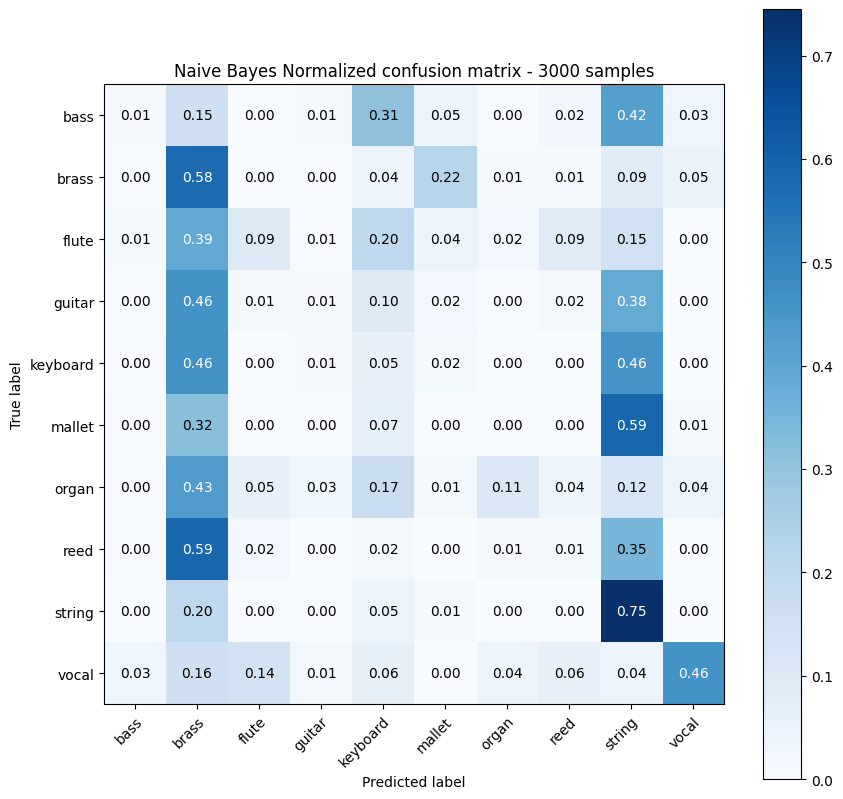

In [ ]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Naive Bayes Normalized confusion matrix - 3000 samples')

# Random Forest - Default Hyperparameters

In [ ]:
#instantiate the random forest
clf_Rf =RandomForestClassifier()

In [ ]:
#Train
clf_Rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = clf_Rf.predict(X_test)
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 58.57%


Normalized confusion matrix
[[0.58718861 0.         0.         0.06168446 0.10794781 0.19217082
  0.02135231 0.02609727 0.         0.00355872]
 [0.02973978 0.65055762 0.03345725 0.03717472 0.01486989 0.
  0.         0.03717472 0.00743494 0.18959108]
 [0.07777778 0.00555556 0.76111111 0.00555556 0.00555556 0.01666667
  0.01111111 0.05       0.         0.06666667]
 [0.15184049 0.00153374 0.00766871 0.50766871 0.24233129 0.07208589
  0.00920245 0.00613497 0.00153374 0.        ]
 [0.15535248 0.0156658  0.00652742 0.22976501 0.51697128 0.05221932
  0.01044386 0.         0.00652742 0.00652742]
 [0.1039604  0.00990099 0.0049505  0.03960396 0.24752475 0.56435644
  0.01980198 0.00990099 0.         0.        ]
 [0.0936255  0.00796813 0.0438247  0.00199203 0.03386454 0.05179283
  0.58366534 0.05378486 0.03386454 0.09561753]
 [0.00425532 0.30212766 0.11489362 0.05106383 0.         0.
  0.         0.39148936 0.11914894 0.01702128]
 [0.04901961 0.         0.         0.02941176 0.00653595 0.03267974


<Axes: title={'center': 'Random Forest Normalized confusion matrix - 3000 samples'}, xlabel='Predicted label', ylabel='True label'>

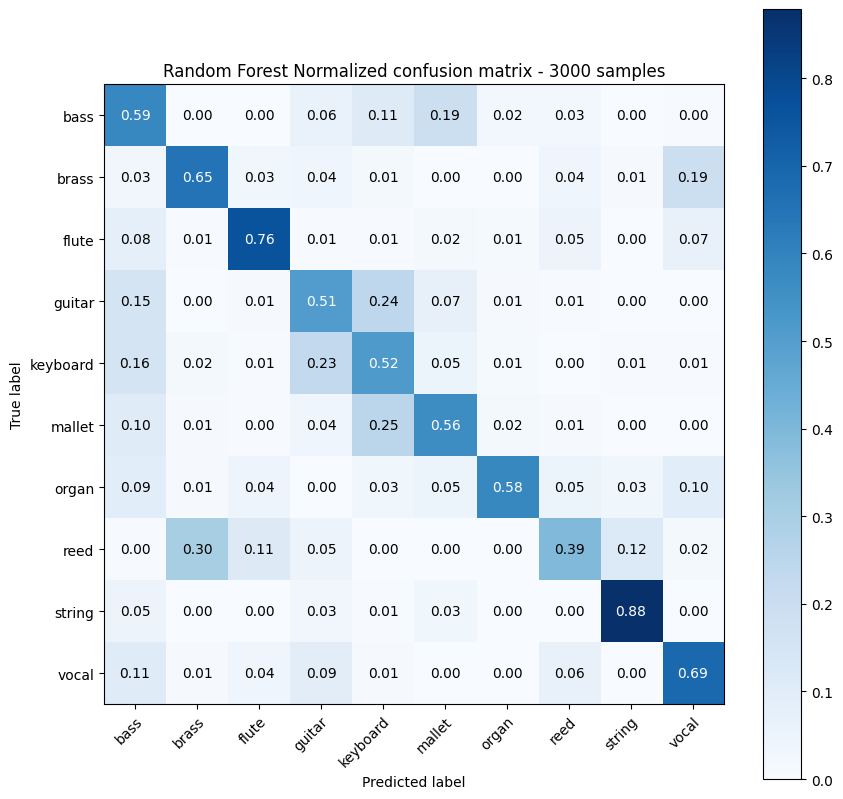

In [ ]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Random Forest Normalized confusion matrix - 3000 samples')

# Random Forest - Random Search

In [ ]:
#instantiate the random forest
clf_Rf_RS=RandomForestClassifier()

In [ ]:
param_rs = {
    "n_estimators" : [32, 64, 128, 256, 512],
    "max_depth": [None, 8, 16, 32, 64],
    "max_features": sp_randint(1, 10),
    "min_samples_split": sp_randint(2, 10),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
    }

In [ ]:
#Random Search
random_search_RF = RandomizedSearchCV(estimator=clf_Rf_RS,
                                      param_distributions=param_rs,
                                      n_iter=15,
                                      cv=5,
                                      n_jobs=-1,
                                      verbose=2)
#Train
random_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 8, 16, 32, 64],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78fde783c430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78fde767cfa0>,
                                        'n_estimators': [32, 64, 128, 256,
                                                         512]},
                   verbose=2)

In [ ]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=4,
                       min_samples_split=5, n_estimators=128)

In [ ]:
print("Random Search Best Parameters:")
print(random_search_RF.best_params_)

Random Search Best Parameters:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 128}


In [ ]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest - Random Search is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest - Random Search is 57.93%


Normalized confusion matrix
[[0.56109134 0.         0.         0.0569395  0.08303677 0.21826809
  0.04626335 0.02965599 0.         0.00474496]
 [0.0260223  0.65799257 0.03717472 0.01486989 0.01486989 0.
  0.         0.03717472 0.01486989 0.19702602]
 [0.06666667 0.         0.66666667 0.02222222 0.03333333 0.01666667
  0.05555556 0.07222222 0.         0.06666667]
 [0.14723926 0.00306748 0.00920245 0.51533742 0.24386503 0.06134969
  0.01380368 0.00460123 0.00153374 0.        ]
 [0.14229765 0.03002611 0.00130548 0.21409922 0.50391645 0.07441253
  0.01697128 0.         0.01174935 0.00522193]
 [0.07425743 0.01485149 0.0049505  0.04950495 0.21287129 0.62871287
  0.0049505  0.00990099 0.         0.        ]
 [0.08565737 0.0059761  0.0498008  0.         0.06175299 0.04581673
  0.57968127 0.04581673 0.0498008  0.07569721]
 [0.01702128 0.2893617  0.07234043 0.06382979 0.         0.
  0.         0.40851064 0.14468085 0.00425532]
 [0.04575163 0.00326797 0.         0.02614379 0.00653595 0.03921569


<Axes: title={'center': 'Random Forest Randomized Search Normalized confusion matrix - 3000 samples'}, xlabel='Predicted label', ylabel='True label'>

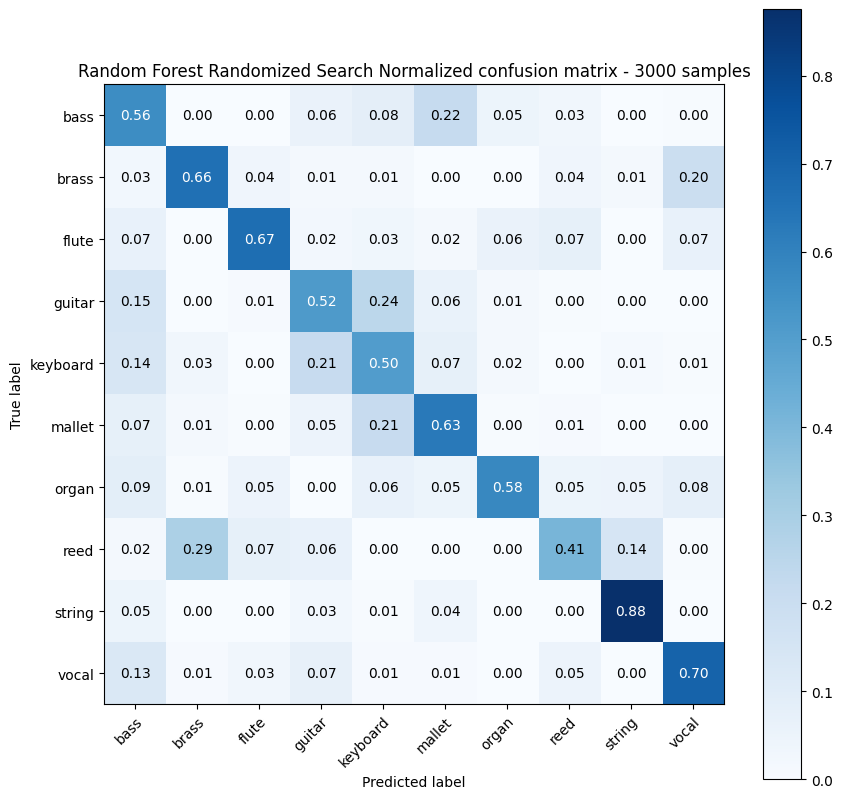

In [ ]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Random Forest Randomized Search Normalized confusion matrix - 3000 samples')

# SVM

In [19]:
#Scale and preprocess the data for the SVM
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [20]:
#instatiate the  classifier
SVM = SVC(C = 10)

In [21]:
#Train
SVM.fit(X_train_scaled, y_train)

SVC(C=10)

In [22]:
y_pred_svm = SVM.predict(X_test_scaled)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

The accuracy of SVMs is 39.62%


Normalized confusion matrix
[[0.23843416 0.00830368 0.0510083  0.05575326 0.22894425 0.20403321
  0.00355872 0.04389087 0.12099644 0.04507711]
 [0.05576208 0.62081784 0.01486989 0.         0.01115242 0.02230483
  0.01115242 0.04460967 0.01115242 0.20817844]
 [0.14444444 0.01111111 0.46666667 0.06111111 0.07222222 0.
  0.05       0.14444444 0.04444444 0.00555556]
 [0.03680982 0.15797546 0.06748466 0.10582822 0.33128834 0.04754601
  0.02453988 0.05214724 0.1702454  0.00613497]
 [0.04046997 0.11488251 0.07180157 0.01827676 0.42167102 0.06657963
  0.02610966 0.08093995 0.15535248 0.00391645]
 [0.03465347 0.14851485 0.0049505  0.03960396 0.10891089 0.30693069
  0.02475248 0.0990099  0.20792079 0.02475248]
 [0.11155378 0.01394422 0.12350598 0.00996016 0.00796813 0.00796813
  0.51792829 0.02788845 0.02589641 0.15338645]
 [0.0212766  0.27234043 0.08510638 0.         0.00425532 0.00425532
  0.         0.35319149 0.23404255 0.02553191]
 [0.00326797 0.00980392 0.03594771 0.00326797 0.03594771 0.0

<Axes: title={'center': 'SVM Normalized confusion matrix - 3000 samples'}, xlabel='Predicted label', ylabel='True label'>

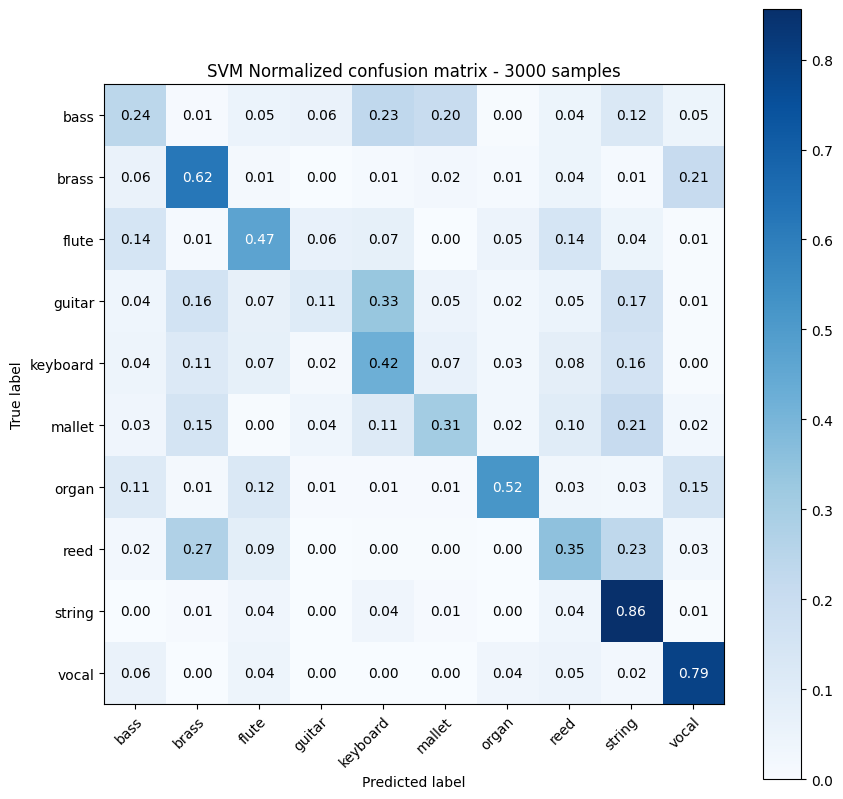

In [23]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='SVM Normalized confusion matrix - 3000 samples')